# Basic Operations

In [2]:
import os
import copy
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import spearmanr, skew, kurtosis
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, normalize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:/ML Projects/Diamond Price Prediction/Notebooks/Data/gemstone.csv")
df.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/01_raw.csv", index = False)
print(df.shape)
df.head()

(193573, 11)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df.duplicated().sum()

df.drop_duplicates(inplace = True)
df.drop(columns = ['id'], inplace = True)
df.rename(columns = {'price': 'target'}, inplace = True)

X = df.drop(columns = ['target'])
y = df['target']

df.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/02_df_id_target.csv", index = False)
X.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/03_X.csv", index = False)
y.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/04_y.csv", index = False)

In [7]:
num_columns = X.select_dtypes(include = 'number').columns.tolist()
cat_columns = X.select_dtypes(include = 'object').columns.tolist()

In [9]:
print(X[cat_columns].nunique())

for col in cat_columns :
    print(X[col].value_counts())

cut        5
color      7
clarity    8
dtype: int64
cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


In [10]:
cat_nominal_columns = []
cat_ordinal_columns = ['cut', 'color', 'clarity']
cat_target_ordinal_columns = []

# Order is from low to high
cut_cat = ['Fair', 'Good', 'Very Good','Ideal', 'Premium']
color_cat = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cat = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

# Missing Values

In [11]:
print(df.isnull().sum().sum())
df.isnull().sum()

0


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
target     0
dtype: int64

No null values

In [12]:
X.describe().to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA statistics/01_describe.csv", index = False)
X.describe()

,carat,depth,table,x,y,z
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000


# Histogram, kde Plot, QQ Plot

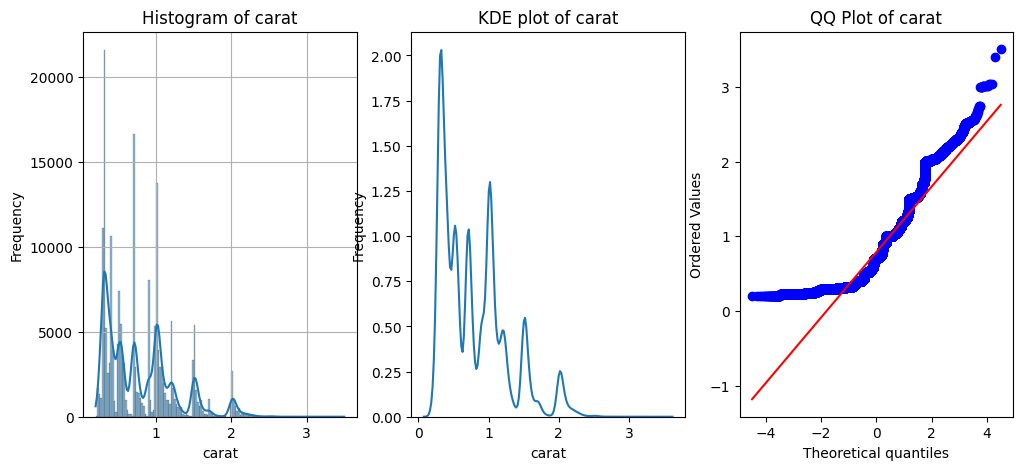

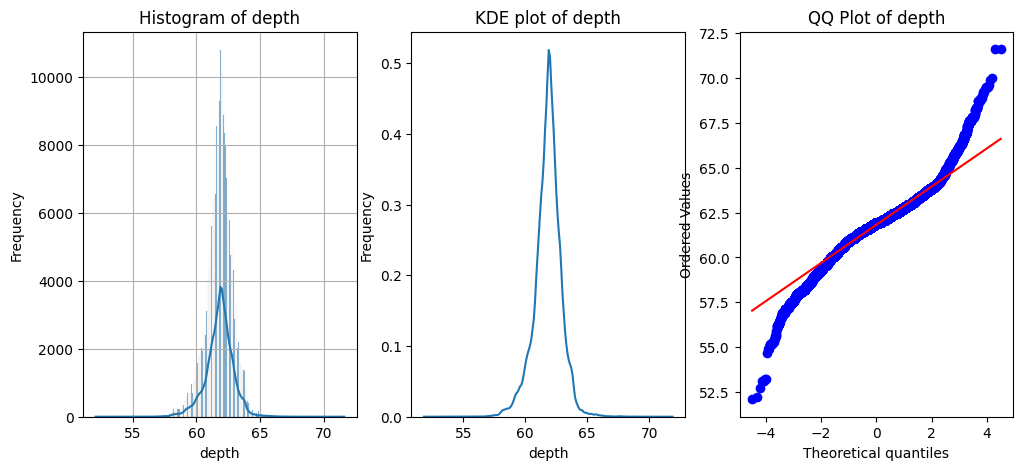

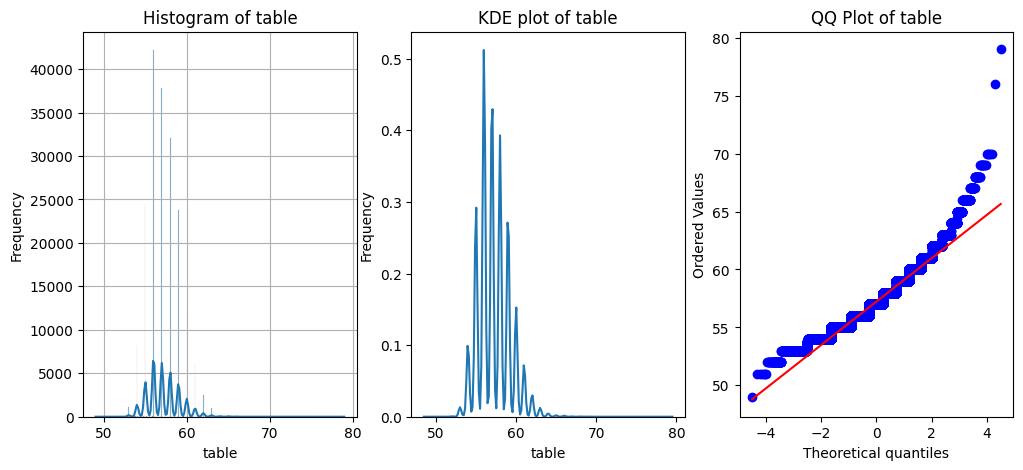

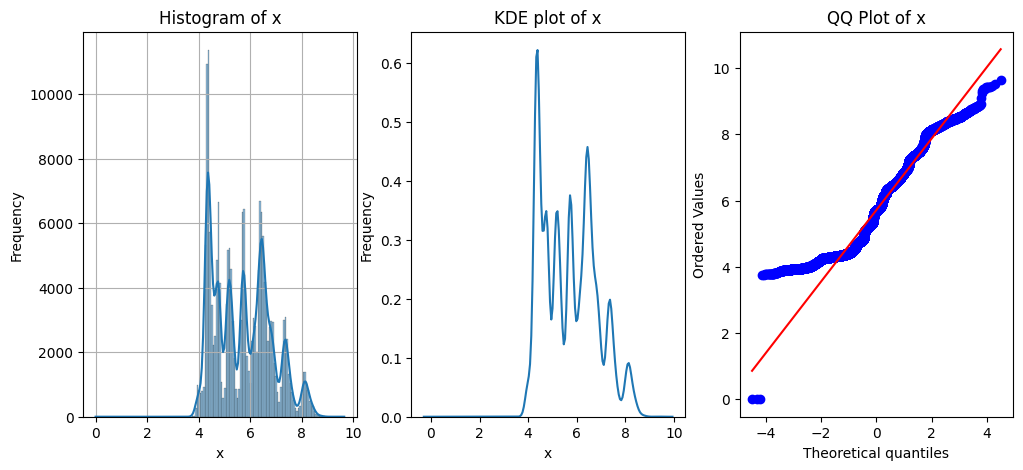

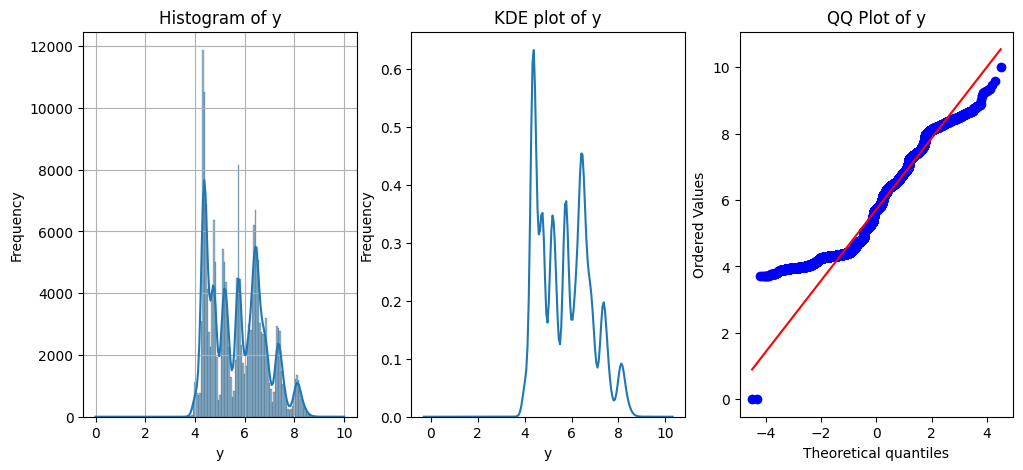

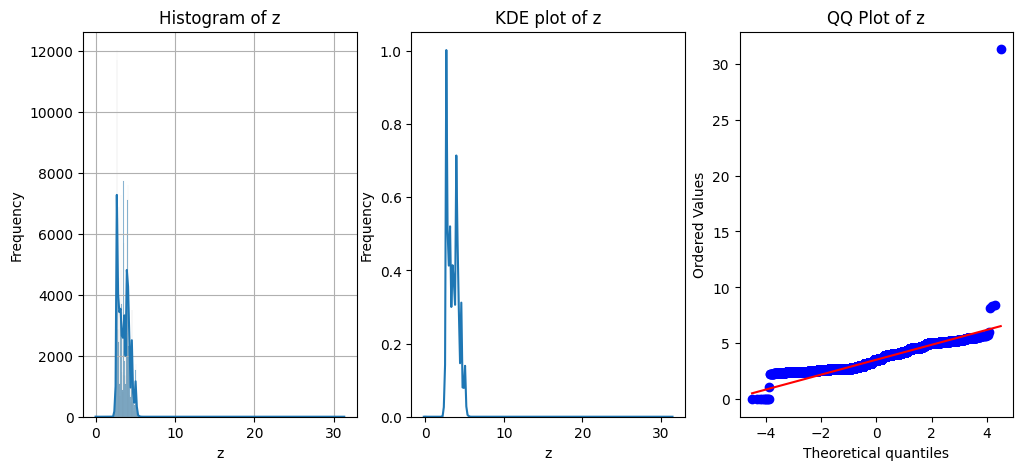

In [13]:
# Histogram, KDE plot and QQ plot of numerical columns
for col in num_columns:

    plt.figure(figsize = (12, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(x = X[col], kde = True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
		
    plt.subplot(1, 3, 2)
    sns.kdeplot(x = X[col])
    plt.title(f'KDE plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
		
    plt.subplot(1, 3, 3)
    stats.probplot(X[col], dist = "norm", plot = plt)
    plt.title(f'QQ Plot of {col}')
        
    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Histogram KDE QQ plots", f'{col}_histogram_kde_QQ.png'))
        
    plt.show()

# Bar plot

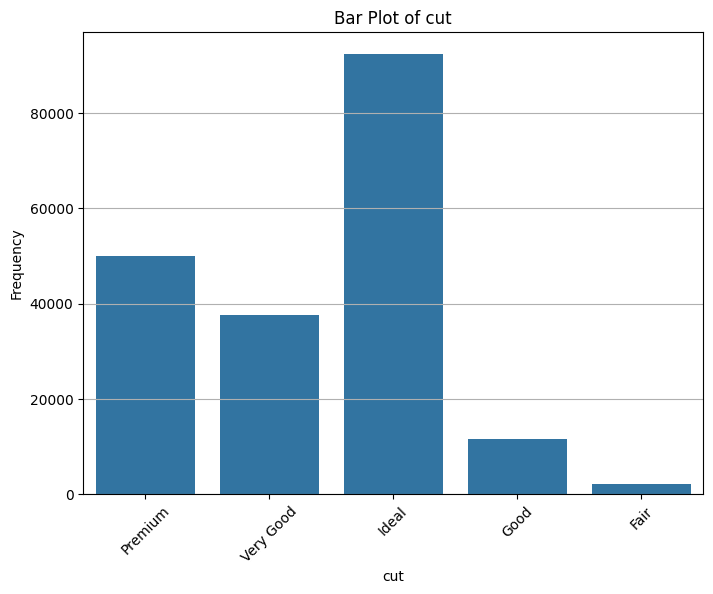

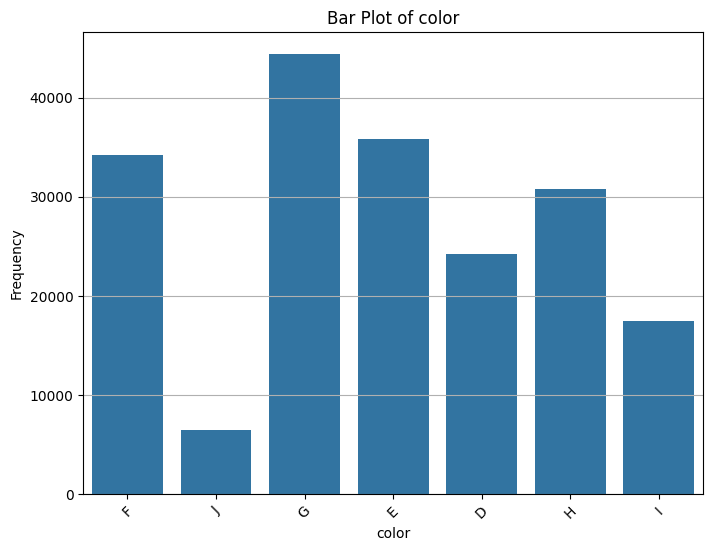

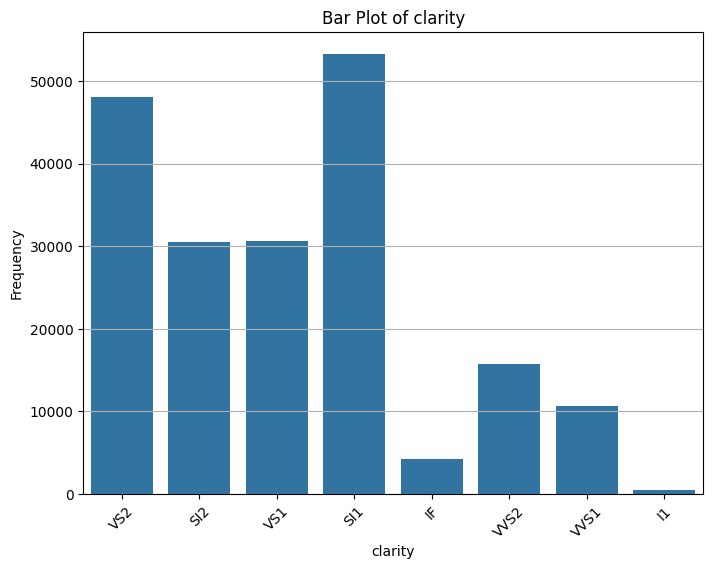

In [14]:
# Bar plot
for col in cat_columns:

    plt.figure(figsize = (8, 6))
    
    sns.countplot(data = X, x = col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 45)  
    plt.grid(axis = 'y')
    
    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Bar plots", f'{col}_barplot.png'))
    
    plt.show()

# Category vs Target

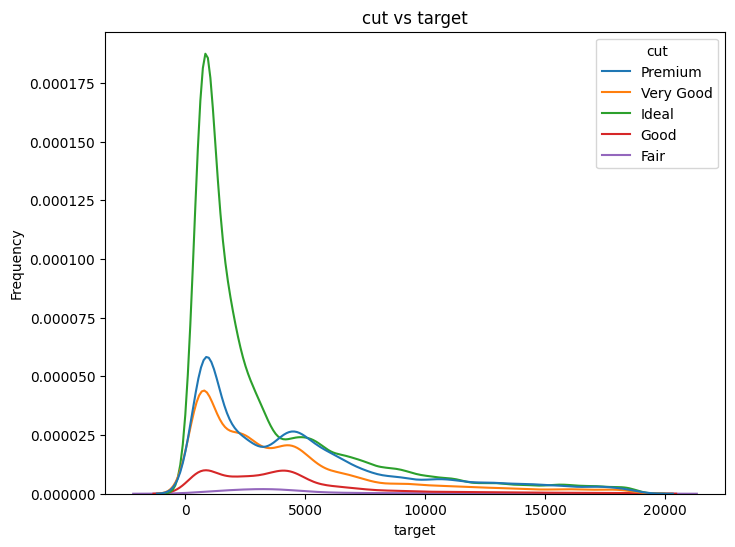

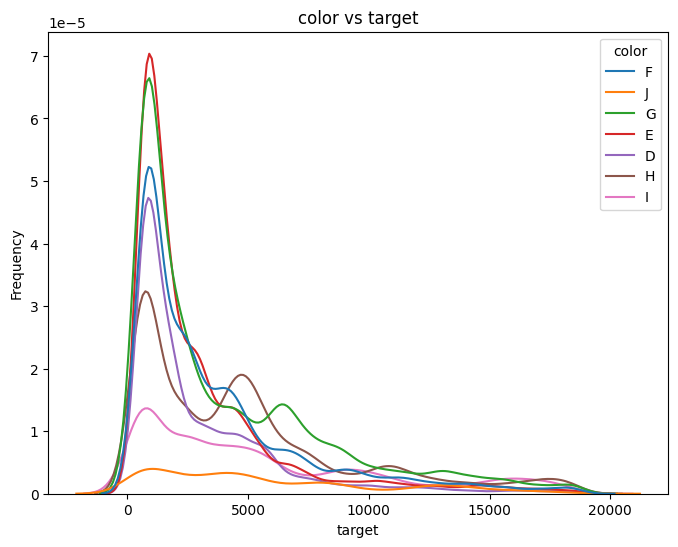

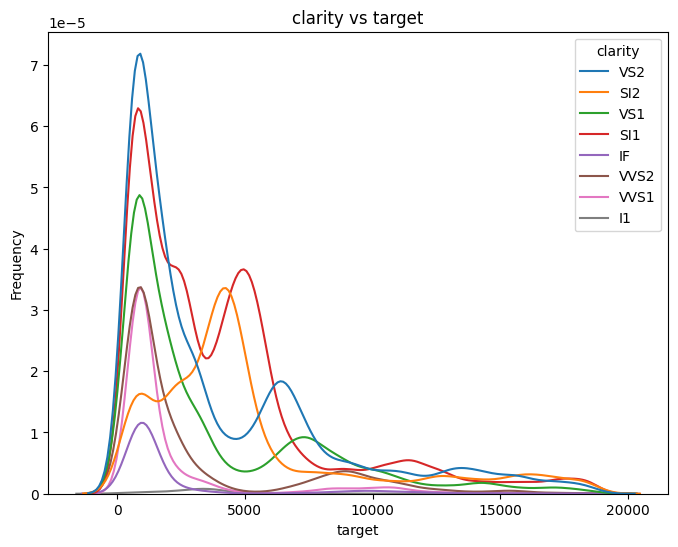

In [15]:
# Category vs target
for col in cat_columns:

    plt.figure(figsize = (8, 6))
    
    sns.kdeplot(data = df, x = 'target', hue = col)
    plt.title(f'{col} vs target')
    plt.xlabel('target')
    plt.ylabel('Frequency')
    
    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Category vs target", f'{col} vs target.png'))
    
    plt.show()

# Numeric features Pair plot

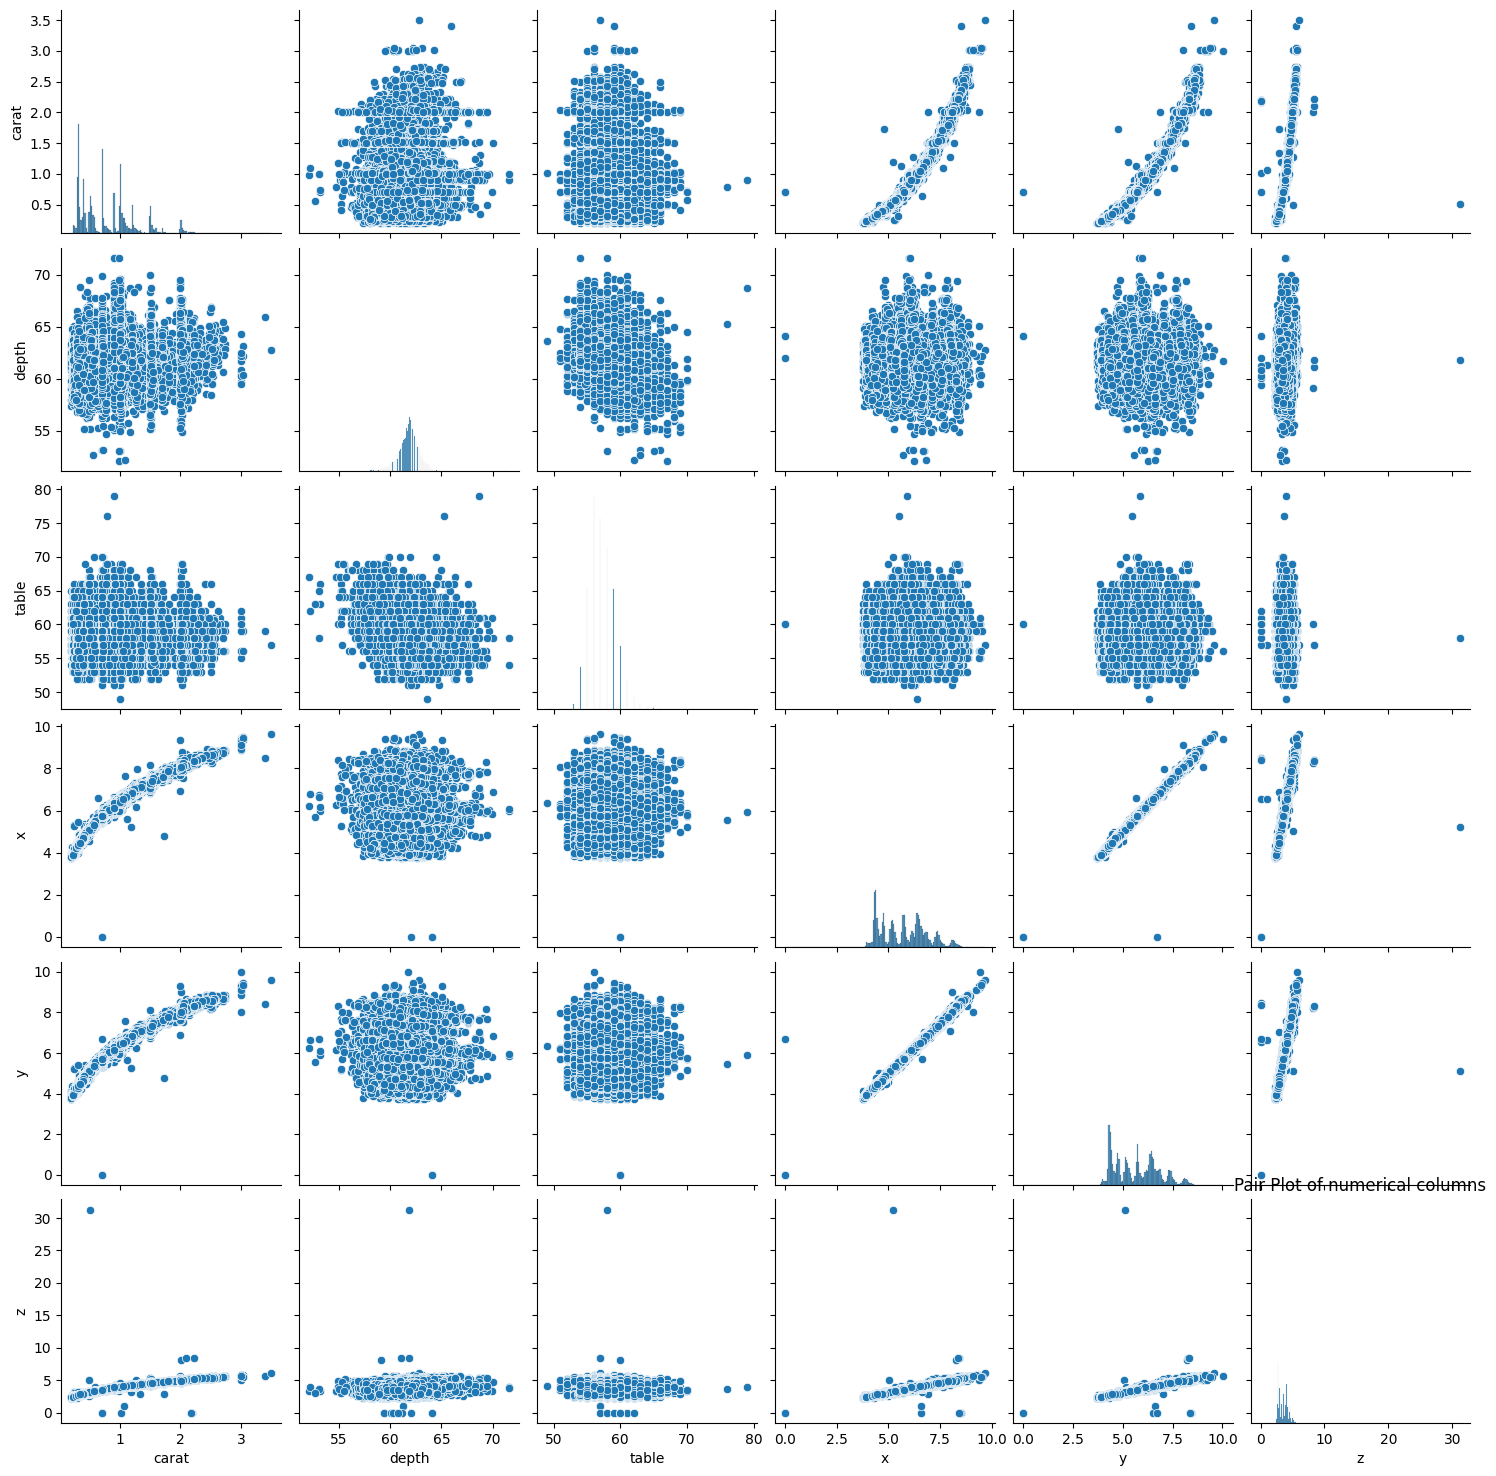

In [16]:
# Pair plot

sns.pairplot(X[num_columns])
plt.title(f'Pair Plot of numerical columns')
plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Numeric features pair plot", f'X_num_pair_plot.png'))
plt.show()

# Segregation of numeric columns

In [17]:
# normally distributed / right skewed / left skewed columns

normally_distributed_cols = []
right_skewed_cols = []
left_skewed_cols = []

for column in X[num_columns].columns :
    skewness = skew(X[column])
    kur = X[column].kurtosis()
    if skewness > 0.8  and kur > 3:
        right_skewed_cols.append(column)
    elif skewness < -0.8 and kur < 3:
        left_skewed_cols.append(column)
    else:
        normally_distributed_cols.append(column)

print(normally_distributed_cols)
print(right_skewed_cols)
print(left_skewed_cols)
# Cross check with QQ plots and then you can remove according to you.

['carat', 'depth', 'table', 'x', 'y', 'z']
[]
[]


# Imputing

No missing values

# Unbalanced dataset & less data points

The target is continous. We have enough data points.

# Outliers

# Box plot

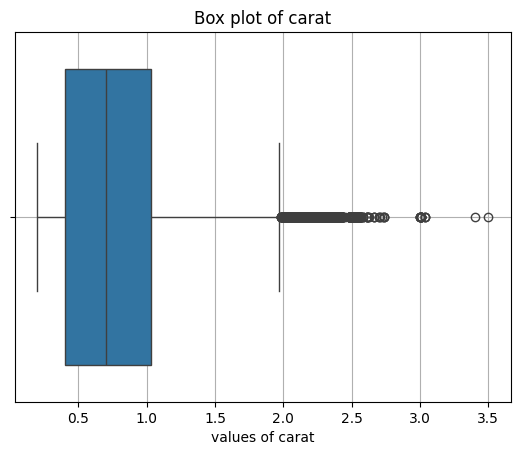

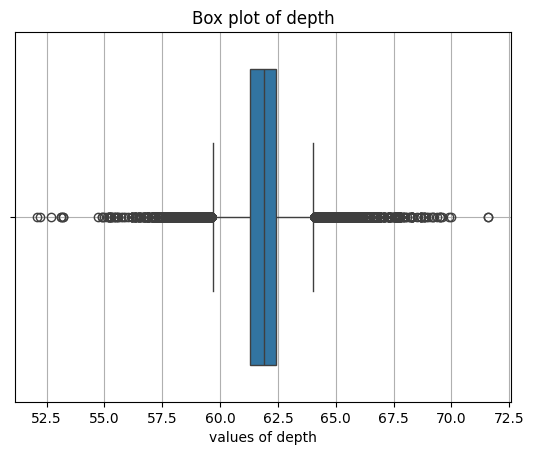

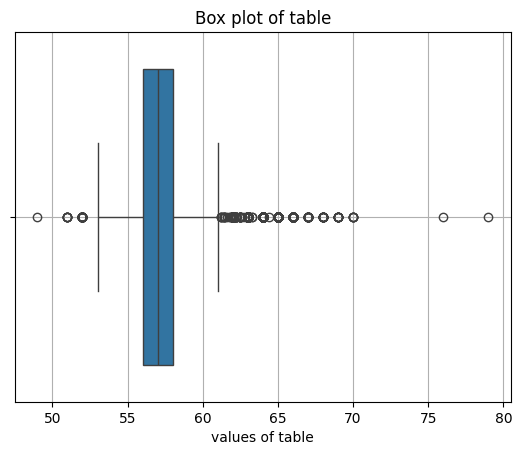

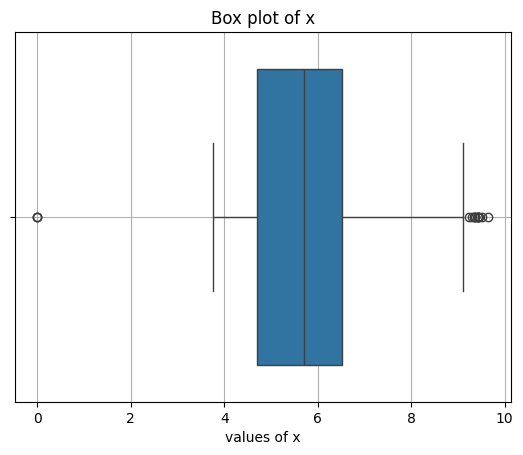

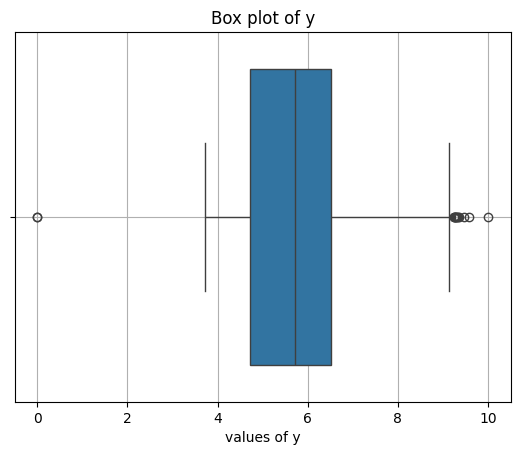

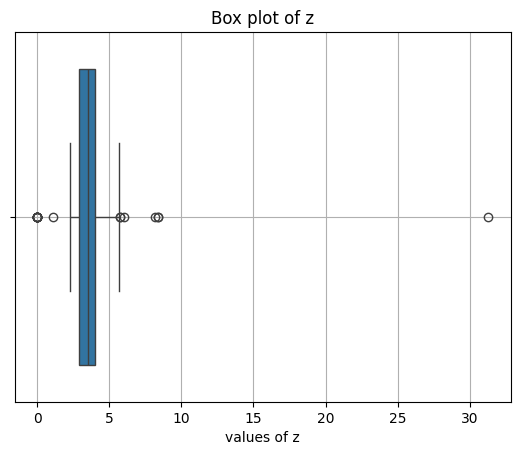

In [18]:
# Box plot of numerical columns
for col in num_columns:

    sns.boxplot(x = X[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(f"values of {col}")
    plt.grid(True)

    plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Box plots", f'{col}_boxplot.png'))

    plt.show()

There are outliers. Those will be handled after learning anamoly detection.

# Feature Engineering

In [19]:
X_num_target = pd.concat([X[num_columns], y], axis = 1)
X_num = pd.DataFrame(X[num_columns])

X_num_target.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/08_X_num_target.csv", index = False)
X_num.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/09_X_num.csv", index = False)

# Feature Selection

# Low variance features

In [20]:
X_num[num_columns].var().map('{:.5f}'.format)

carat    0.21408
depth    1.17008
table    3.68196
x        1.23082
y        1.21514
z        0.47461
dtype: object

There are no low variance features.

# Correlation of features

In [21]:
spearman_corr_matrix_target, p_values = spearmanr(X_num_target)
spearman_corr_df_target = pd.DataFrame(spearman_corr_matrix_target, columns = X_num_target.columns, index = X_num_target.columns)

spearman_corr_matrix, p_values = spearmanr(X_num)
spearman_corr_df = pd.DataFrame(spearman_corr_matrix, columns = X_num.columns, index = X_num.columns)

In [22]:
spearman_corr_df_target

,carat,depth,table,x,y,z,target
carat,1.000000,0.041616,0.236490,0.996571,0.996355,0.995100,0.971464
depth,0.041616,1.000000,-0.155237,-0.007418,-0.007715,0.109601,0.030422
table,0.236490,-0.155237,1.000000,0.240389,0.233958,0.210753,0.223147
x,0.996571,-0.007418,0.240389,1.000000,0.998210,0.990030,0.972332
y,0.996355,-0.007715,0.233958,0.998210,1.000000,0.990000,0.971596
z,0.995100,0.109601,0.210753,0.990030,0.990000,1.000000,0.968425
target,0.971464,0.030422,0.223147,0.972332,0.971596,0.968425,1.000000


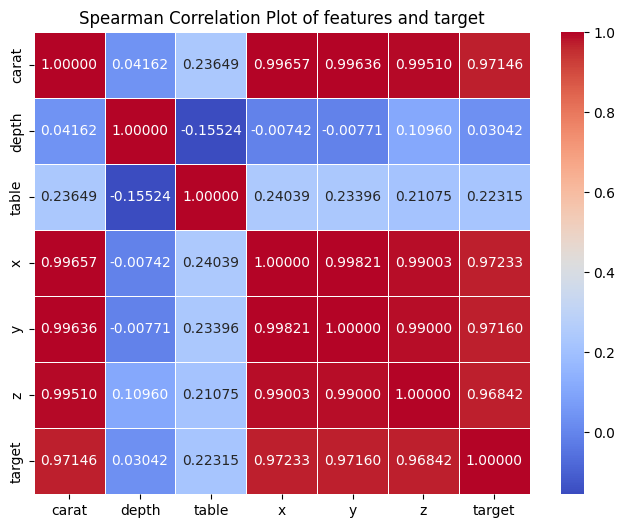

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_df_target, annot=True, cmap='coolwarm', fmt=".5f", linewidths=.5)
plt.title('Spearman Correlation Plot of features and target')
plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Correlation plots", f'corr_num_target.png'))
plt.show()

In [24]:
# Removing the features with are least correlataed with target
threshold = 0.1 # min correlation needed to be selected

features_not_correlated_with_target = [] 

for i in range(len(spearman_corr_df_target.columns)) :
    if abs(spearman_corr_df_target.iloc[i, len(spearman_corr_df_target.columns) - 1]) < threshold :
        features_not_correlated_with_target.append(spearman_corr_df_target.columns[i])

print(features_not_correlated_with_target)

['depth']


In [25]:
spearman_corr_df

,carat,depth,table,x,y,z
carat,1.000000,0.041616,0.236490,0.996571,0.996355,0.995100
depth,0.041616,1.000000,-0.155237,-0.007418,-0.007715,0.109601
table,0.236490,-0.155237,1.000000,0.240389,0.233958,0.210753
x,0.996571,-0.007418,0.240389,1.000000,0.998210,0.990030
y,0.996355,-0.007715,0.233958,0.998210,1.000000,0.990000
z,0.995100,0.109601,0.210753,0.990030,0.990000,1.000000


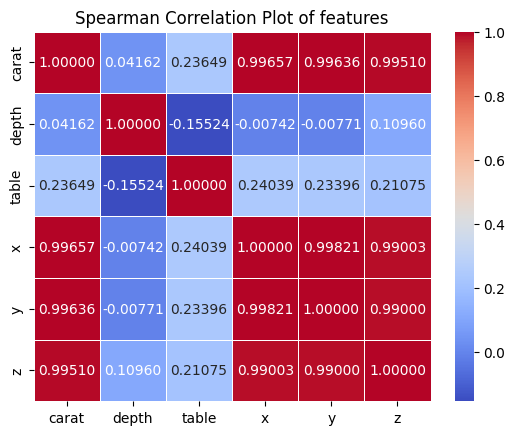

In [26]:
sns.heatmap(spearman_corr_df, annot=True, cmap = 'coolwarm', fmt = ".5f", linewidths=.5)
plt.title('Spearman Correlation Plot of features')
plt.savefig(os.path.join(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA plots/Correlation plots", f'corr_num.png'))
plt.show()

In [27]:
# Removing the features with are highly correlated to each other
threshold = 0.85 # max correlation needed to be selected

features_correlated = {} 

for i in range(len(spearman_corr_df.columns)) :
    for j in range(len(spearman_corr_df.columns)) :
        if i == j :
            continue
        if spearman_corr_df.iloc[i, j] > threshold :
            list_key = features_correlated.get(spearman_corr_df.columns[i], [])
            list_key.append(spearman_corr_df.index[j])
            features_correlated[spearman_corr_df.columns[i]] = list_key
         
print(features_correlated)

{'carat': ['x', 'y', 'z'], 'x': ['carat', 'y', 'z'], 'y': ['carat', 'x', 'z'], 'z': ['carat', 'x', 'y']}


In [28]:
features_to_be_dropped = copy.deepcopy(features_not_correlated_with_target) + ['x', 'y', 'z'] # Features to be dropped  
features_to_be_dropped                                                                        # if they are highly correlated            

['depth', 'x', 'y', 'z']

In [29]:
for i in features_to_be_dropped :
    num_columns.remove(i)
X.drop(columns = features_to_be_dropped, inplace = True)
X.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/11_X_MIF.csv", index = False)
# most important features

# Train Test Split

In [30]:
# Split ratio train : test
split_ratio = [80, 20]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = float(split_ratio[1] / 100), random_state = 42)

X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

X_train.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/12_X_train.csv", index = False)
y_train.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/13_y_train.csv", index = False)
X_test.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/14_X_test.csv", index = False)
y_test.to_csv(r"C:/ML Projects/Diamond Price Prediction/Artifacts/EDA intermediate datasets/15_y_test.csv", index = False)

# Numerical Scaling & Categorical encoding